# Simple Linear Regression

## Background: Predicting the Quality of Wine

March 1990 - Orley Ashenfelter, a Princeton economics professor, claims he can predict wine quality without tasting the wine.

Ashenfelter used a method called **linear regression**    
* Predicts a **target** a.k.a. outcome variable/ dependent variable    
* Predicts using a set of **features** a.k.a. independent variables    

**target**    
* price - inferred quality of wine; typical price in 1990-1991 wine auctions approximates quality; note that the value in the dataset is the logarithm of the actual price 

**features**    
* age - older wines are more expensive    
* weather    
    * avg growing season temperature (AGST)
    * harvest rain    
    * winter rain    


## One-Variable Linear Regression

Import relevant libraries

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

Load the data

In [115]:
wine_data = pd.read_csv('wine.csv')

In [116]:
wine_data.head(5)

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
0,1952,7.4950,600,17.1167,160,31,43183.569
1,1953,8.0393,690,16.7333,80,30,43495.030
2,1955,7.6858,502,17.1500,130,28,44217.857
3,1957,6.9845,420,16.1333,110,26,45152.252
4,1958,6.7772,582,16.4167,187,25,45653.805


Compare wine price against one variable (e.g. AGST)

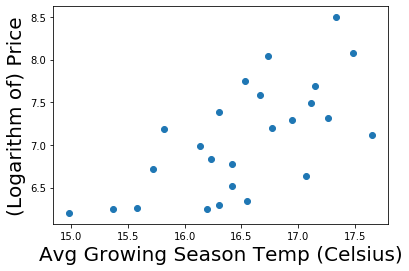

In [117]:
x1 = wine_data['AGST']
y = wine_data['Price']

plt.scatter(x1, y)
plt.xlabel('Avg Growing Season Temp (Celsius)', fontsize=20)
plt.ylabel('(Logarithm of) Price', fontsize=20)
plt.show()

The goal of linear regression is to create a predictive line through the data. There are many different lines that could be drawn to predict wine price using AGST.

One simple option is to draw a line base on average price.

In [118]:
avg_price = wine_data['Price'].mean()
f"Average Price = {avg_price}"

'Average Price = 7.0672239999999995'

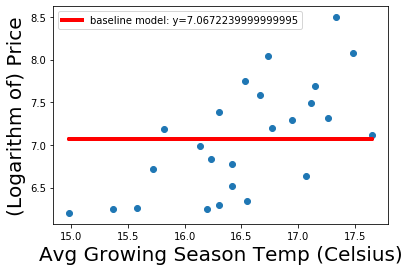

In [119]:
x1 = wine_data['AGST']
y = wine_data['Price']

plt.scatter(x1, y)
plt.xlabel('Avg Growing Season Temp (Celsius)', fontsize=20)
plt.ylabel('(Logarithm of) Price', fontsize=20)

wine_data['avg_price'] = avg_price
y = wine_data['avg_price'] 
plt.plot(x1, y, lw=4, c='red', label=f"baseline model: y={avg_price}")
plt.legend(loc='best')
plt.show()


In [120]:
f"This would predict {avg_price} regardless of the given temperature. However, we want to predict more precisely since we have a known feature i.e. the temperature"

'This would predict 7.0672239999999995 regardless of the given temperature. However, we want to predict more precisely since we have a known feature i.e. the temperature'

## One-varable regression model  
We'll do this by using linear regression via the [OLS](https://en.wikipedia.org/wiki/Ordinary_least_squares) model from stasmodels library.    
  
$y = \beta_0 + \beta_1x_1 + \varepsilon$    
where:    
* $y$ - price (inferred as quality of wine)    
* $x_1$ - given temperature value    
* $\beta_1$ - temperature coefficient; it quantifies the effect of temperatures on price      
* $\beta_0$ - constant; maybe something like tax (it's added to the price of all wines regardless of the temperature)    
* $\varepsilon$ - error of estimation; it's the difference between the actual price and the predicted price    



In [121]:
y = wine_data['Price']
x1 = wine_data['AGST']
x = sm.add_constant(x1)

ols_model = sm.OLS(y, x).fit()
ols_model.summary()
ols_model.params ## coefficients

const   -3.417761
AGST     0.635094
dtype: float64

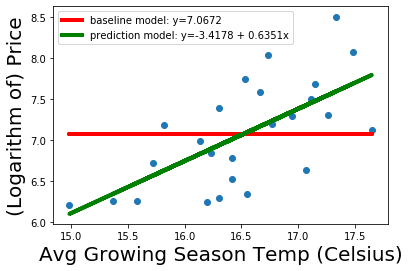

In [122]:
x1 = wine_data['AGST']
y = wine_data['Price']

plt.scatter(x1, y)
plt.xlabel('Avg Growing Season Temp (Celsius)', fontsize=20)
plt.ylabel('(Logarithm of) Price', fontsize=20)

wine_data['avg_price'] = avg_price
y = wine_data['avg_price'] 
plt.plot(x1, y, lw=4, c='red', label=f"baseline model: y={round(avg_price, 4)}")

b0 = ols_model.params[0] 
b1 =  ols_model.params[1]
yhat = b0 + b1*x1
plt.plot(x1, yhat, lw=4, c='green', label=f"prediction model: y={round(b0,4)} + {round(b1,4)}x")

plt.legend(loc='best')
plt.show()


Let's predict some values

In [123]:
# original data
wine_data[['AGST','Price']].head(3)

,AGST,Price
0,17.1167,7.4950
1,16.7333,8.0393
2,17.1500,7.6858


In [124]:
# prediction    
# yhat = b0 + b1*x1
b0 + b1*17.1167

7.452957418953958

In [125]:
new_data = pd.DataFrame({'AGST':[17.1167, 16.7333, 17.1500]})
new_data = sm.add_constant(new_data)
new_data

,const,AGST
0,1.0,17.1167
1,1.0,16.7333
2,1.0,17.1500


In [126]:
new_data['Predicted Price'] = ols_model.predict(new_data)
new_data['Actual Price'] = wine_data[['Price']].head(3)
new_data['Error'] = new_data['Actual Price'] - new_data['Predicted Price'] 
new_data[['AGST', 'Actual Price', 'Predicted Price', 'Error']]

,AGST,Actual Price,Predicted Price,Error
0,17.1167,7.4950,7.452957,0.042043
1,16.7333,8.0393,7.209462,0.829838
2,17.1500,7.6858,7.474106,0.211694


## How good is our model?

### SSE    
SSE - Sum of Squares Error This is the difference between the observed value and the predicted value.     
The smaller the error, the better the estimation power of the regression.     

#### $\sum_{i=1}^n \varepsilon_i^2$    
where:     
$\varepsilon$ - error of estimation; it's the difference between the actual price and the predicted price

In [127]:
## errors from our baseline (avg price)
SST = sum((wine_data['Price'] - wine_data['Price'].mean())**2)
f"SST = {SST}"

'SST = 10.1506377256'

In [128]:
## errors from our model
SSE = sum((wine_data['Price'] - ols_model.fittedvalues)**2)
f"SSE = {SSE}"

'SSE = 5.734875147020119'

### $R^2 = 1 - \frac{SSE}{SST}$    
R-squared is a relative measure and takes values ranging from 0 to 1.    
An R-squared of zero means our regression line explains none of the variability of the data.    
An R-squared of one means our regression line explains the entire variability.    

In [129]:
f"R^2 = {1 - (SSE/SST)}"

'R^2 = 0.43502316779991934'

In [130]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     17.71
Date:                Fri, 24 Jul 2020   Prob (F-statistic):           0.000335
Time:                        04:42:12   Log-Likelihood:                -17.070
No. Observations:                  25   AIC:                             38.14
Df Residuals:                      23   BIC:                             40.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.4178      2.494     -1.371      0.184      -8.576       1.740
AGST           0.6351      0.151      4.208      0.000       0.323       0.947
==============================================================================
Omnibus:                        0.986   Durbin-Watson:                   1.758
Prob(Omnibus):                  0.611   Jarque-Bera (JB):                0.790
Skew:                           0.055   Prob(JB):                        0.674
Kurtosis:                       2.136   Cond. No.                         414.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""